In [11]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, matthews_corrcoef, recall_score, precision_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve
import torch.nn.functional as F
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [38]:
train = pd.read_csv('/root/autodl-tmp/data/train.csv')
train_data = train.iloc[:, :-1]
train_label = train.iloc[:, -1]

test = pd.read_csv('/root/autodl-tmp/data/test.csv')
test_data = test.iloc[:, :-1]
test_label = test.iloc[:, -1]

In [12]:
loaded_datasets_info = torch.load('/root/autodl-tmp/data/saved_datasets.pth', weights_only=False)
train_dataset = loaded_datasets_info['train_dataset']
val_dataset = loaded_datasets_info['val_dataset']

In [13]:
from torch.utils.data import DataLoader

def extract_features_labels_from_subset(subset):
    
    loader = DataLoader(subset, batch_size=len(subset))
    
    for features, labels in loader:
        features = features.squeeze(1).numpy()
        labels = labels.squeeze(1).numpy()
        return features, labels

X_train, y_train = extract_features_labels_from_subset(train_dataset)
X_val, y_val = extract_features_labels_from_subset(val_dataset)

In [50]:
X_train = train_data
y_train = train_label

In [5]:
type_dict = {'Graduate':0, 'Dropout':1, 'Enrolled':2}
y_train = y_train.map(type_dict)
y_train = np.eye(3)[y_train] # one-hot encoding

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [68]:
students=pd.read_csv("/root/autodl-tmp/data/train.csv")

/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


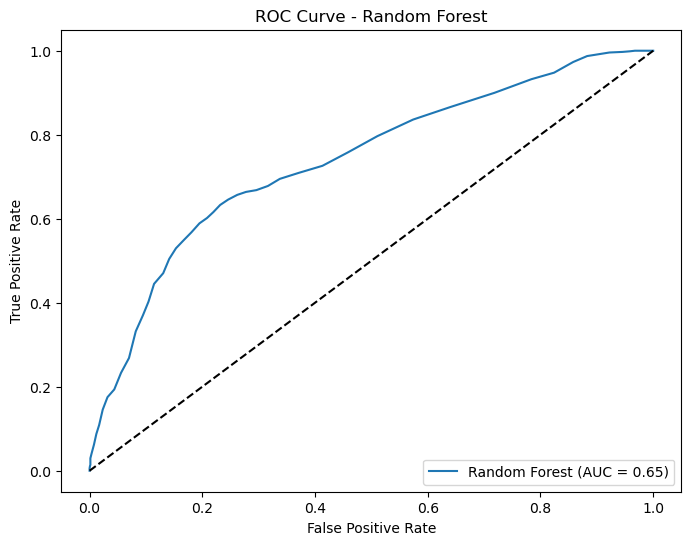


Model: Random Forest
Precision: 0.52
Recall: 0.45
Accuracy: 0.59
F1 Score: 0.43


/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


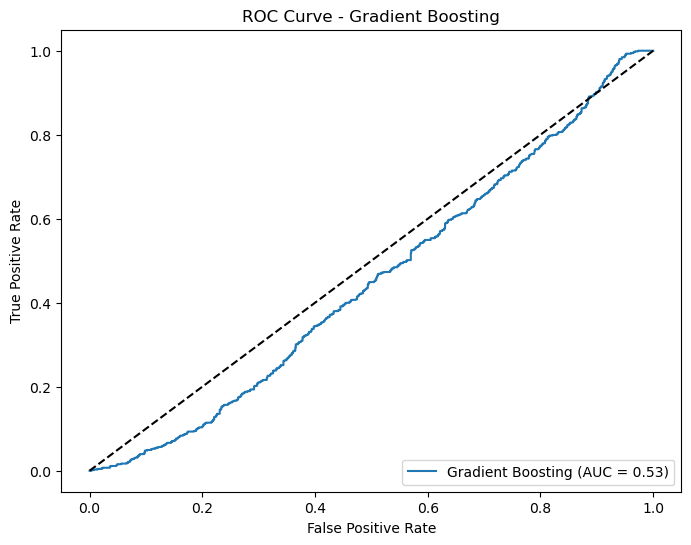


Model: Gradient Boosting
Precision: 0.42
Recall: 0.36
Accuracy: 0.28
F1 Score: 0.27


/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


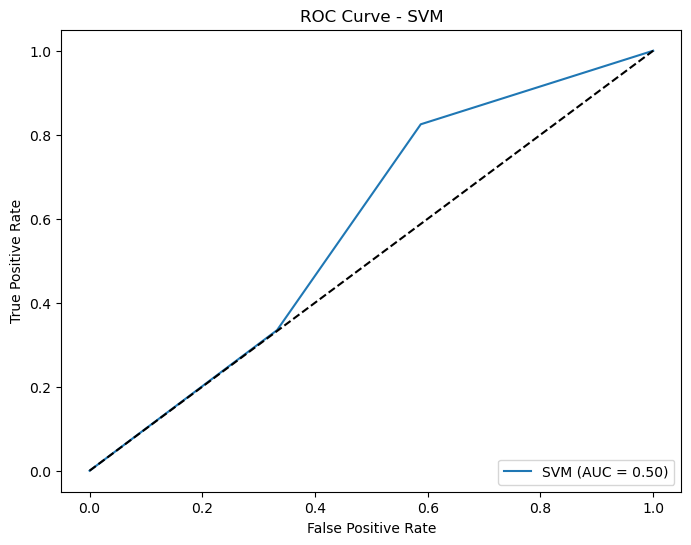

/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/root/miniconda3/envs/SWEdiff/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}


Model: SVM
Precision: 0.16
Recall: 0.33
Accuracy: 0.49
F1 Score: 0.22


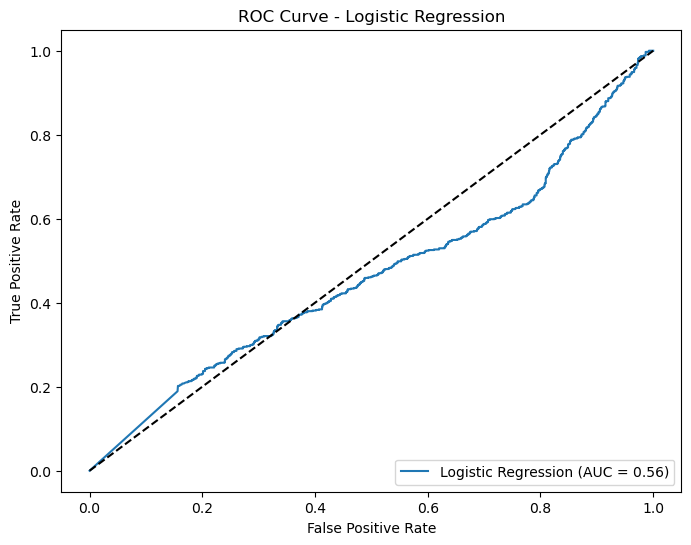


Model: Logistic Regression
Precision: 0.11
Recall: 0.33
Accuracy: 0.33
F1 Score: 0.17


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, roc_curve

# Preprocess the categorical columns
label_encoder = LabelEncoder()
categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]
for column in categorical_columns:
    students[column] = label_encoder.fit_transform(students[column])

# Prepare the data
X = students.drop(columns=['Target'])
y = students['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Create a dictionary to store models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='ovr')
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate evaluation metrics
    auc_roc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class='ovr', average='macro')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Plot ROC curve for each class (multi-class scenario)
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba.ravel())
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Display evaluation metrics
    print(f"\nModel: {model_name}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [60]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0,7,5,1,1,0,0,12,9,5,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,0,5,1,10,1,0,0,0,2,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,0,0,5,4,1,0,0,21,26,9,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,0,7,2,14,1,0,0,22,26,5,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,1,11,1,2,0,0,0,21,27,9,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,6,14,1,0,0,0,0,5,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,0,0,2,14,1,0,18,0,0,9,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,0,0,1,11,1,0,0,21,26,9,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,0,0,1,8,1,0,0,21,26,7,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [62]:
students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,7,5,1,1,0,0,12,9,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,0,5,1,10,1,0,0,0,2,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,0,0,5,4,1,0,0,21,26,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,0,7,2,14,1,0,0,22,26,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,1,11,1,2,0,0,0,21,27,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,6,14,1,0,0,0,0,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,0,0,2,14,1,0,18,0,0,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,0,0,1,11,1,0,0,21,26,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,0,0,1,8,1,0,0,21,26,7,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [64]:
y_train

3383     Dropout
2840    Enrolled
564     Graduate
1786     Dropout
3900    Graduate
          ...   
3444     Dropout
466     Enrolled
3092    Graduate
3772    Graduate
860      Dropout
Name: Target, Length: 3539, dtype: object

In [65]:
pd.get_dummies(y_test)

,Dropout,Enrolled,Graduate
1255,True,False,False
3458,False,False,True
3390,False,False,True
1497,False,False,True
1536,True,False,False
...,...,...,...
3162,False,False,True
3281,True,False,False
436,False,True,False
1434,False,True,False


In [66]:
y_test

1255     Dropout
3458    Graduate
3390    Graduate
1497    Graduate
1536     Dropout
          ...   
3162    Graduate
3281     Dropout
436     Enrolled
1434    Enrolled
1361    Graduate
Name: Target, Length: 885, dtype: object

In [67]:
y_pred_proba

array([[0.52319029, 0.47266213, 0.00414758],
       [0.06468631, 0.19546418, 0.73984951],
       [0.04539407, 0.04290217, 0.91170376],
       ...,
       [0.05339354, 0.10433197, 0.84227449],
       [0.04515489, 0.16873776, 0.78610735],
       [0.03538253, 0.04101868, 0.92359878]])

In [29]:
#### 

In [ ]:
# get roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC
def calculate_multiclass_metrics(true_labels, predicted_labels, predicted_probabilities, num_classes):
    accuracy = accuracy_score(true_labels, predicted_labels)
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    
    sensitivity_per_class = []
    specificity_per_class = []
    auc_per_class = []
    f1_per_class = []

    for i in range(num_classes):
        true_binary = (np.array(true_labels) == i).astype(int)
        pred_binary = (np.array(predicted_labels) == i).astype(int)

        cm = confusion_matrix(true_binary, pred_binary, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity_per_class.append(sensitivity)
        specificity_per_class.append(specificity)

        
        auc = roc_auc_score(true_binary, predicted_probabilities[:, i]) if len(np.unique(true_binary)) > 1 else 0
        auc_per_class.append(auc)

        f1 = f1_score(true_binary, pred_binary) if len(np.unique(true_binary)) > 1 else 0
        f1_per_class.append(f1)

    avg_sensitivity = np.mean(sensitivity_per_class)
    avg_specificity = np.mean(specificity_per_class)
    avg_auc = np.mean(auc_per_class) if auc_per_class else 0
    avg_f1 = np.mean(f1_per_class)

    print(f"Average AUC: {avg_auc:.4f}")
    print(f"Average Sensitivity: {avg_sensitivity:.4f}")
    print(f"Average Specificity: {avg_specificity:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Average F1-score: {avg_f1:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

#### 1. XGB

In [10]:
xgb_model = GradientBoostingClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (4267, 3) instead.

In [54]:
y_pred = xgb_model.predict(X_train)

In [55]:
y_pred

array(['Graduate', 'Dropout', 'Graduate', ..., 'Enrolled', 'Graduate',
       'Graduate'], dtype=object)

In [56]:
true_labels_ = np.argmax(y_train, axis=-1)
predicted_labels = np.argmax(y_pred, axis=-1)
preds = torch.tensor(y_pred)
preds = F.softmax(preds, dim=-1)

train_metrics = calculate_multiclass_metrics(true_labels_, predicted_labels, preds, num_classes=10)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [48]:
size = 8
class Net_conv(torch.nn.Module):
    def __init__(self, input_length):
        super(Net_conv, self).__init__()
        self.block_1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=1,
                            out_channels=size,
                            kernel_size=1,
                            stride=1,
                            padding=0),
            torch.nn.BatchNorm1d(size),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv1d(in_channels=size,
                                out_channels=2*size,
                                kernel_size=3,
                                stride=1,
                                padding=1),
            torch.nn.BatchNorm1d(2*size)
        )
        self.block_2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=2*size,
                            out_channels=4*size,
                            kernel_size=1,
                            stride=1,
                            padding=0),
            torch.nn.BatchNorm1d(4*size),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv1d(in_channels=4*size,
                                out_channels=2*size,
                                kernel_size=3, 
                                stride=1,
                                padding=1),
            torch.nn.BatchNorm1d(2*size)
        )
        iutput_size_block_1 = (input_length - 1 + 2 * 0) // 1 + 1  
        output_size_block_2 = (iutput_size_block_1 - 1 + 2 * 0) // 1 + 1  
        num_channels_last_layer = 2*size 
        linear_input_size = num_channels_last_layer * output_size_block_2    
        self.linear_1 = torch.nn.Linear(linear_input_size, 3)
    
    def forward(self, x):
        shortcut = x.float()
        x = self.block_1(x)
        x = torch.nn.functional.relu(x + shortcut)    
        shortcut = x
        x = self.block_2(x)
        x = torch.nn.functional.relu(x + shortcut)     
        x = x.view(x.size(0), -1)
        x =  self.linear_1(x)
        return x

In [72]:
device = "cuda"
model = Net_conv(input_length = 25).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  
criterion = nn.CrossEntropyLoss().to(device)
num_epochs = 200

In [73]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_indx, (inputs, labels) in enumerate(loaded_train_dataset):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    # Print average loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / (len(loaded_train_dataset) / batch_size)}")

Epoch 1/200, Loss: 80.63170161358146
Epoch 2/200, Loss: 64.77978049322617
Epoch 3/200, Loss: 61.21438658514688
Epoch 4/200, Loss: 59.43782807782639
Epoch 5/200, Loss: 58.19146563840467
Epoch 6/200, Loss: 57.18301229698714
Epoch 7/200, Loss: 56.325253705645714
Epoch 8/200, Loss: 55.53791980410731
Epoch 9/200, Loss: 54.828122396801795
Epoch 10/200, Loss: 54.153942645982255
Epoch 11/200, Loss: 53.495988665625106
Epoch 12/200, Loss: 52.938870843066724
Epoch 13/200, Loss: 52.33762458313343
Epoch 14/200, Loss: 51.72577770643456
Epoch 15/200, Loss: 51.183014969493065
Epoch 16/200, Loss: 50.726692967636644
Epoch 17/200, Loss: 50.23341546224994
Epoch 18/200, Loss: 49.84944462776184
Epoch 19/200, Loss: 49.33554807374644
Epoch 20/200, Loss: 48.867357539576155
Epoch 21/200, Loss: 48.41254596100297
Epoch 22/200, Loss: 47.99883400284967
Epoch 23/200, Loss: 47.543328584626664
Epoch 24/200, Loss: 47.11311237756596
Epoch 25/200, Loss: 46.62824224594028
Epoch 26/200, Loss: 46.30114692588185
Epoch 27/200

In [74]:
torch.save(model.state_dict(), '/root/autodl-tmp/model_params/CNN.pth')

In [75]:
model.load_state_dict(torch.load('/root/autodl-tmp/model_params/CNN.pth', weights_only=False))

<All keys matched successfully>

### Metrics function definition

In [76]:
# get roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC
def calculate_multiclass_metrics(true_labels, predicted_labels, predicted_probabilities, num_classes):
    accuracy = accuracy_score(true_labels, predicted_labels)
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    
    sensitivity_per_class = []
    specificity_per_class = []
    auc_per_class = []
    f1_per_class = []

    for i in range(num_classes):
        true_binary = (np.array(true_labels) == i).astype(int)
        pred_binary = (np.array(predicted_labels) == i).astype(int)

        cm = confusion_matrix(true_binary, pred_binary, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity_per_class.append(sensitivity)
        specificity_per_class.append(specificity)

        
        auc = roc_auc_score(true_binary, predicted_probabilities[:, i]) if len(np.unique(true_binary)) > 1 else 0
        auc_per_class.append(auc)

        f1 = f1_score(true_binary, pred_binary) if len(np.unique(true_binary)) > 1 else 0
        f1_per_class.append(f1)

    avg_sensitivity = np.mean(sensitivity_per_class)
    avg_specificity = np.mean(specificity_per_class)
    avg_auc = np.mean(auc_per_class) if auc_per_class else 0
    avg_f1 = np.mean(f1_per_class)

    print(f"Average AUC: {avg_auc:.4f}")
    print(f"Average Sensitivity: {avg_sensitivity:.4f}")
    print(f"Average Specificity: {avg_specificity:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Average F1-score: {avg_f1:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

### Training data metrics

In [77]:
predicted_probabilities = []
true_labels = []
with torch.set_grad_enabled(False):
    for batch_indx, (inputs, labels) in enumerate(loaded_train_dataset):
        inputs = inputs.to(device)
        labels = labels.to(device)      
        outputs = model(inputs)
        predicted_probabilities.extend(outputs.tolist())
        true_labels.extend(labels.tolist())

In [78]:
true_labels_ = np.argmax(true_labels, axis=-1)
predicted_labels = np.argmax(predicted_probabilities, axis=-1)
preds = torch.tensor(predicted_probabilities)
preds = F.softmax(preds, dim=-1)

train_metrics = calculate_multiclass_metrics(true_labels_, predicted_labels, preds, num_classes=10)

Average AUC: 0.2980
Average Sensitivity: 0.2789
Average Specificity: 0.9895
Accuracy: 0.9297
Average F1-score: 0.2790
Matthews Correlation Coefficient (MCC): 0.8960


In [79]:
np.save('/root/autodl-tmp/ROC/CNN/y_train_pred.npy', preds)
np.save('/root/autodl-tmp/ROC/CNN/y_train.npy', true_labels)

### Validation data metrics

In [80]:
predicted_probabilities = []  
true_labels = []  
with torch.set_grad_enabled(False): 
    for batch_indx, (inputs, labels) in enumerate(loaded_val_dataset):
        inputs = inputs.to(device)
        labels = labels.to(device)    
        outputs = model(inputs)
        predicted_probabilities.extend(outputs.tolist())
        true_labels.extend(labels.tolist())

In [81]:
true_labels_ = np.argmax(true_labels, axis=-1)
predicted_labels = np.argmax(predicted_probabilities, axis=-1)
preds = torch.tensor(predicted_probabilities)
preds = F.softmax(preds, dim=-1)

test_metrics = calculate_multiclass_metrics(true_labels_, predicted_labels, preds, num_classes=10)

Average AUC: 0.2698
Average Sensitivity: 0.2209
Average Specificity: 0.9605
Accuracy: 0.7366
Average F1-score: 0.2212
Matthews Correlation Coefficient (MCC): 0.6083


In [82]:
np.save('/root/autodl-tmp/ROC/CNN/y_val_pred.npy', preds)
np.save('/root/autodl-tmp/ROC/CNN/y_val.npy', true_labels)